In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

%matplotlib inline

In [46]:
filepath = '/content/laptop_pricing_dataset_mod1.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [47]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB
None


In [7]:
df.isnull().sum()

,0
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
Screen_Size_cm,4
CPU_frequency,0
RAM_GB,0
Storage_GB_SSD,0


In [48]:
df['Weight_kg'].replace(np.nan, df['Weight_kg'].mean(axis = 0), inplace = True)

/tmp/ipython-input-1856218642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].replace(np.nan, df['Weight_kg'].mean(axis = 0), inplace = True)


In [ ]:
df['Weight_kg'].isnull().sum()

np.int64(0)

# Note that values in **"Screen_Size_cm"** attribute are categorical in nature, and some values are missing. Therefore, replace the missing values of Screen Size with the most frequent value of the attribute.



In [49]:
df['Screen_Size_cm'].replace(np.nan, df['Screen_Size_cm'].value_counts().idxmax(), inplace = True)
df['Screen_Size_cm'].isnull().sum()

/tmp/ipython-input-3182632415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].replace(np.nan, df['Screen_Size_cm'].value_counts().idxmax(), inplace = True)


np.int64(0)

# Data Standardization
The value of **Screen_size** usually has a standard unit of inches. Similarly, **Weight** of the laptop is needed to be in pounds

In [50]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

**Data Normalization**

normalize a continuous data attribut

In [11]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df['CPU_frequency'].max()

1.0

In [12]:
df['Weight_pounds'] = (df['Weight_pounds'] - df['Weight_pounds'].min()) / (df['Weight_pounds'].max() - df['Weight_pounds'].min())
display(df.head())

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.0,0.551724,8,256,0.283154,978
1,Dell,3,Full HD,1,1,3,15.6,0.689655,4,256,0.498208,634
2,Dell,3,Full HD,1,1,7,15.6,0.931034,8,256,0.498208,946
3,Dell,4,IPS Panel,2,1,5,13.3,0.551724,8,128,0.146953,1244
4,HP,4,Full HD,2,1,7,15.6,0.620690,8,256,0.394265,837


**Binning**

Binning attribute "Price" into 3 bins named "Low", "Medium" and "High"

In [51]:
bins = np.linspace(min(df['Price']),max(df['Price']), 4)
groupNames = ['Low', 'Medium', 'High']
df['Price_binned']  = pd.cut(df['Price'], bins, labels = groupNames, include_lowest = True)

In [52]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned
0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.52800,978,Low
1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85100,634,Low
2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85100,946,Low
3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69010,1244,Low
4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21155,837,Low


Text(0.5, 1.0, 'Price bins')

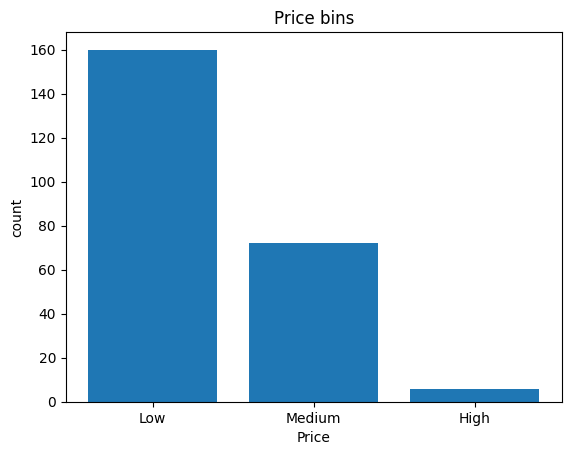

In [53]:
plt.bar(groupNames, df["Price_binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

**Indicator variables**

Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD".

In [54]:
dummy = pd.get_dummies(df['Screen'])
dummy.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy], axis = 1)
df.drop("Screen", axis = 1, inplace = True)

In [55]:
df[['Screen-Full_HD','Screen-IPS_panel']] = df[['Screen-Full_HD','Screen-IPS_panel']].astype('int')

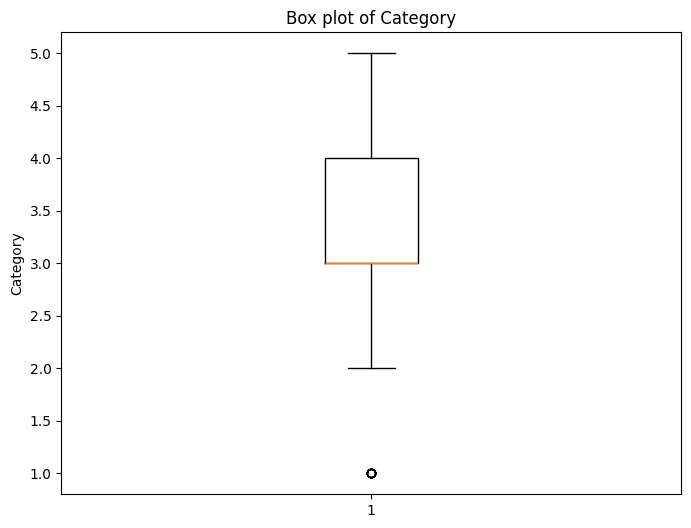

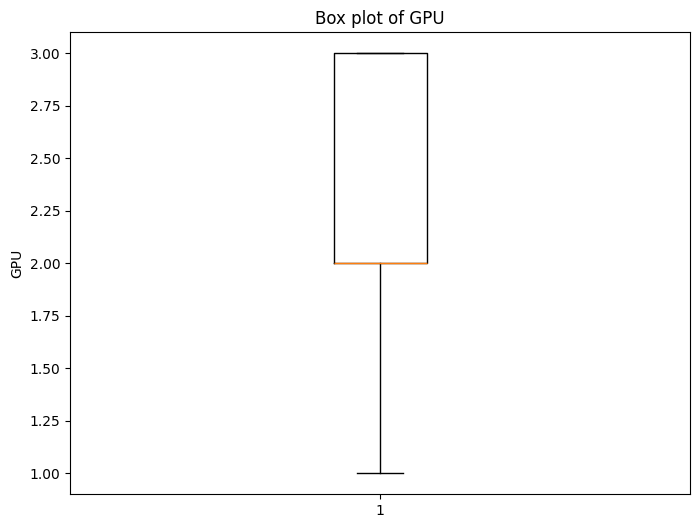

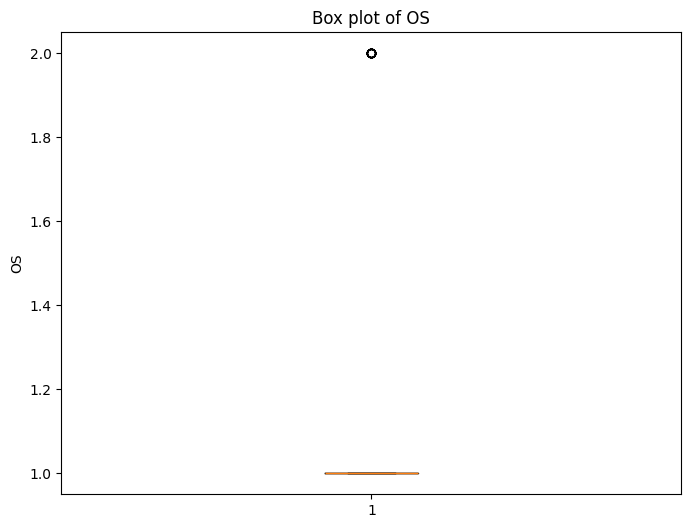

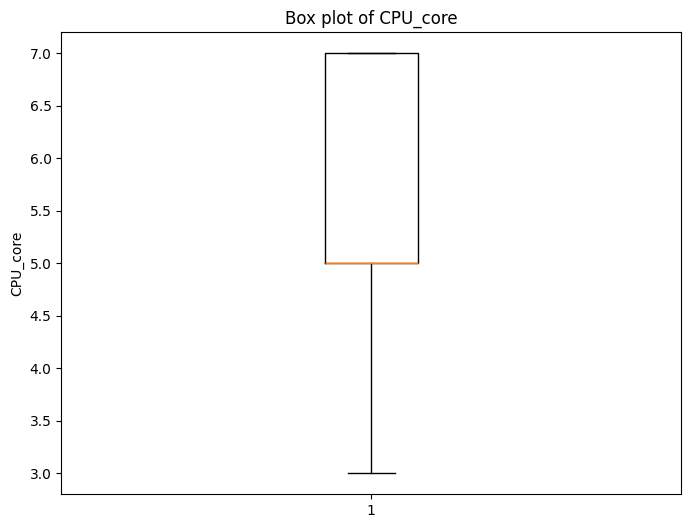

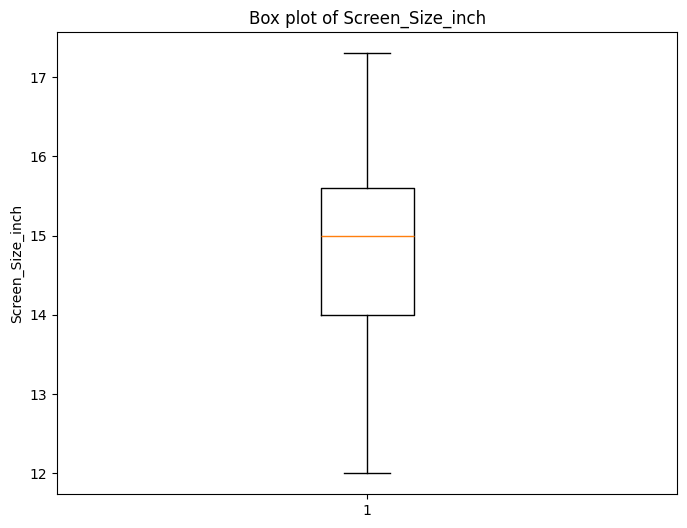

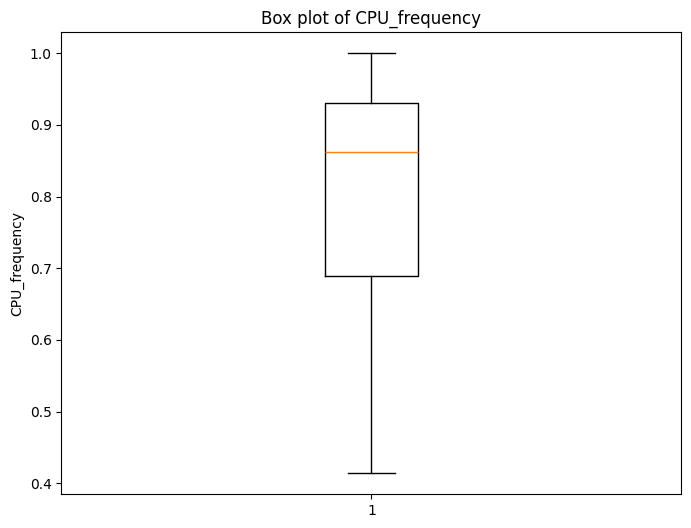

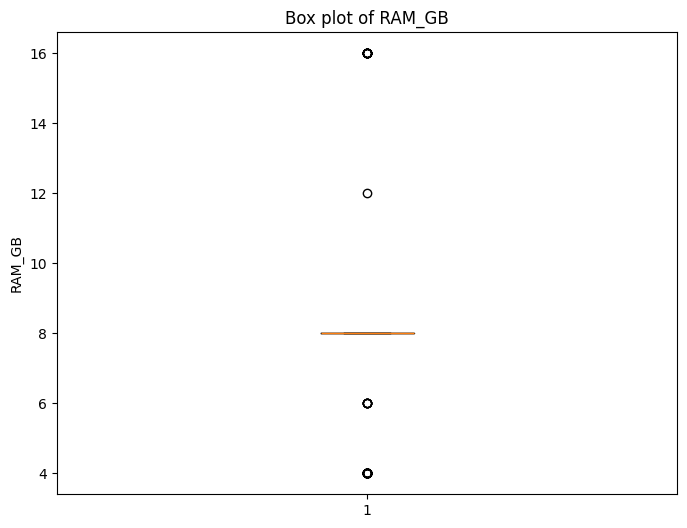

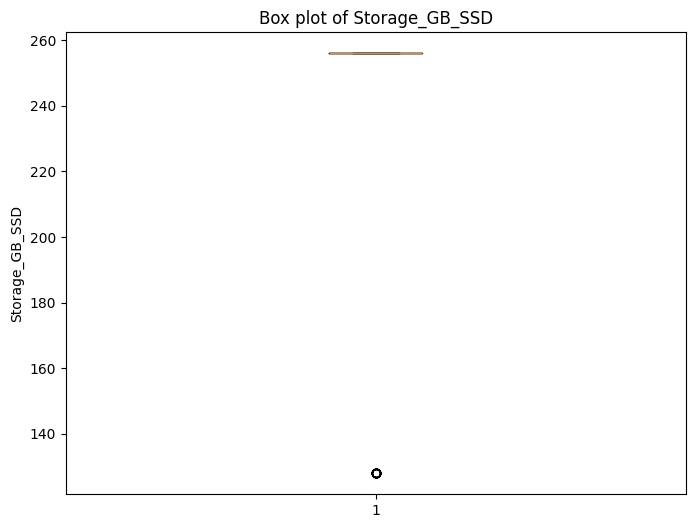

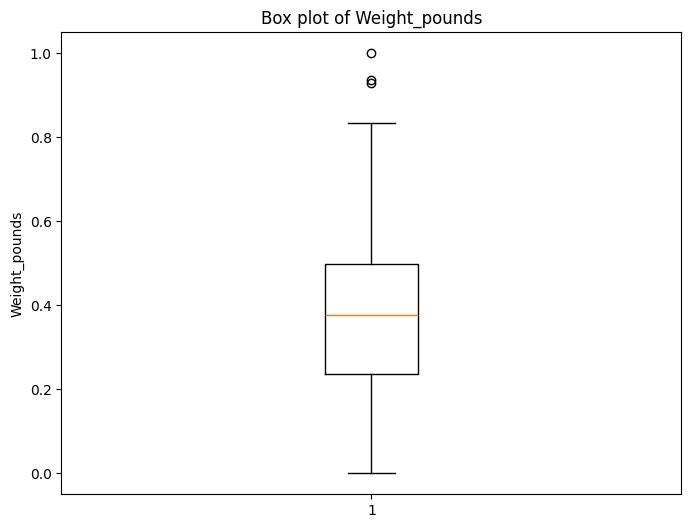

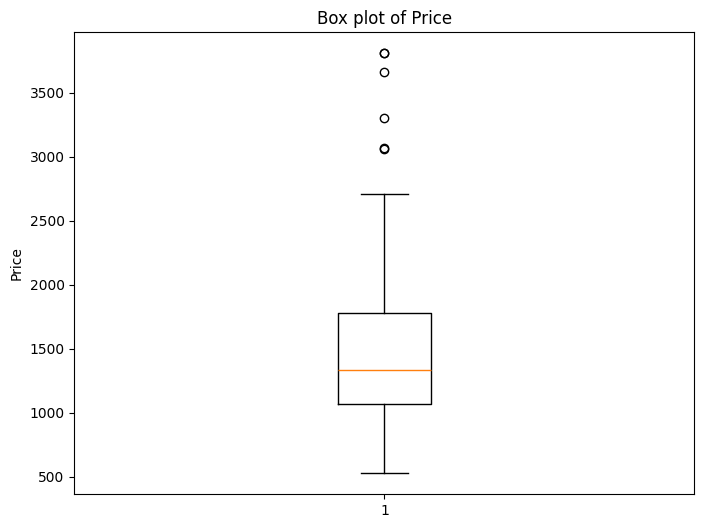

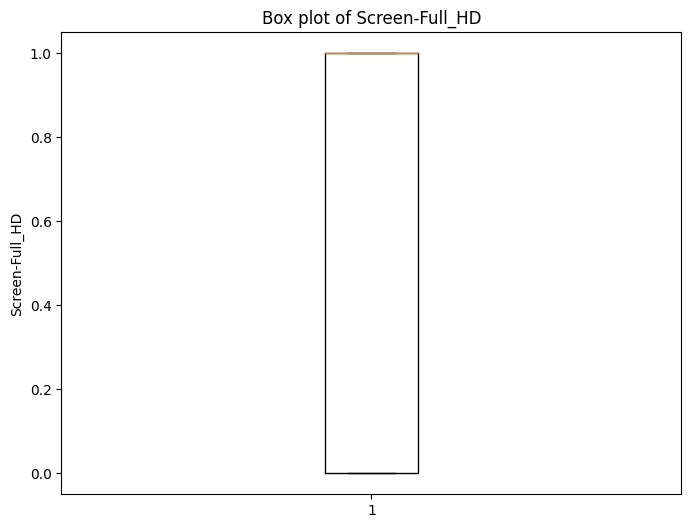

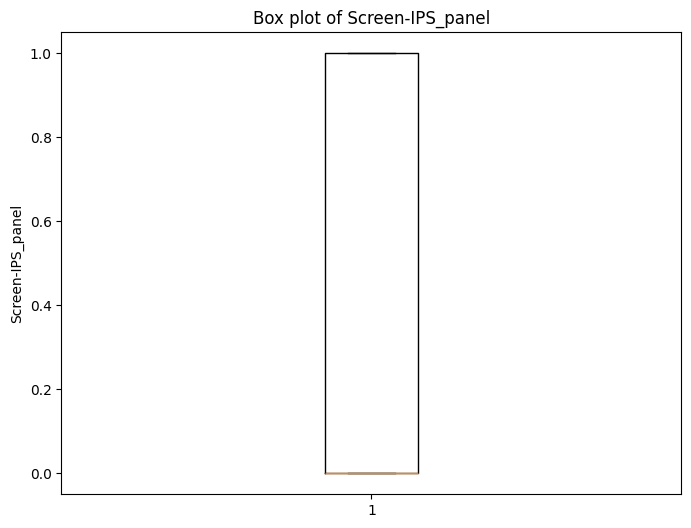

In [19]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

In [57]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

numerical_cols_to_handle = df.select_dtypes(include=np.number).columns.drop('Price_binned', errors='ignore')

for col in numerical_cols_to_handle:
    df = cap_outliers_iqr(df, col)

df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4.0,2,1,5,14.0,1.6,8,256,3.52800,978.0,Low,0,1
1,Dell,3.0,1,1,3,15.6,2.0,8,256,4.85100,634.0,Low,1,0
2,Dell,3.0,1,1,7,15.6,2.7,8,256,4.85100,946.0,Low,1,0
3,Dell,4.0,2,1,5,13.3,1.6,8,256,2.69010,1244.0,Low,0,1
4,HP,4.0,2,1,7,15.6,1.8,8,256,4.21155,837.0,Low,1,0


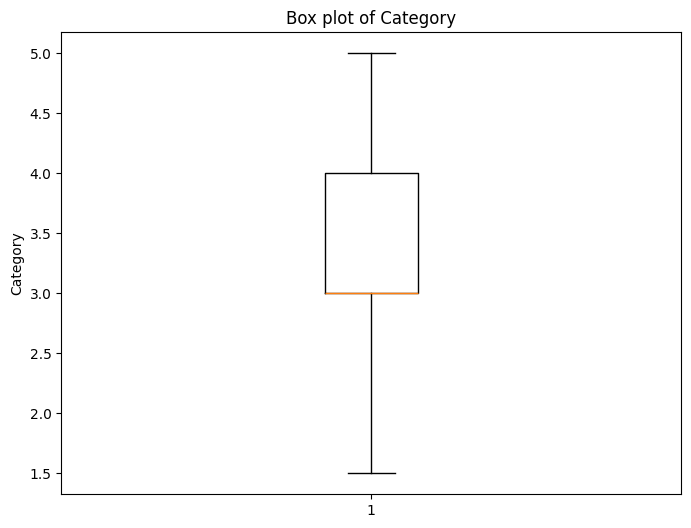

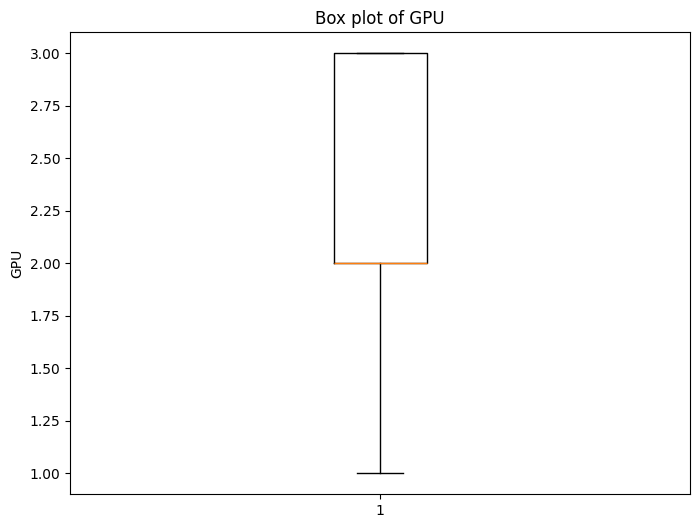

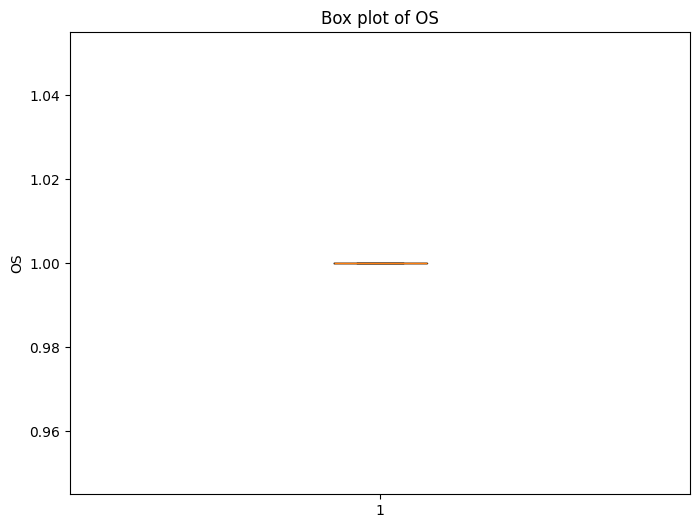

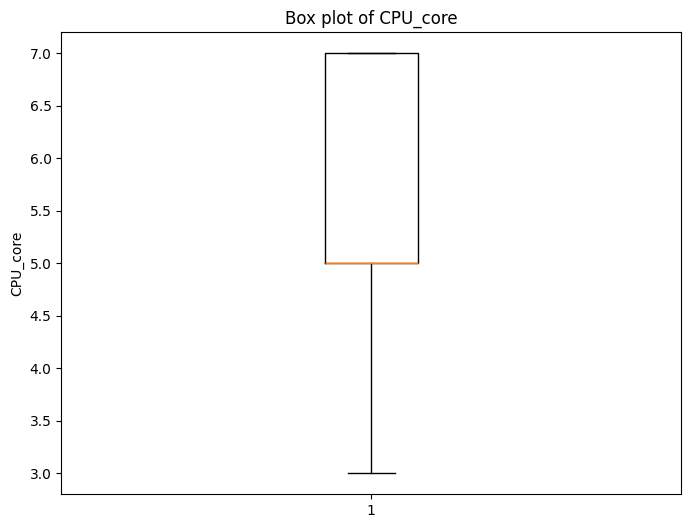

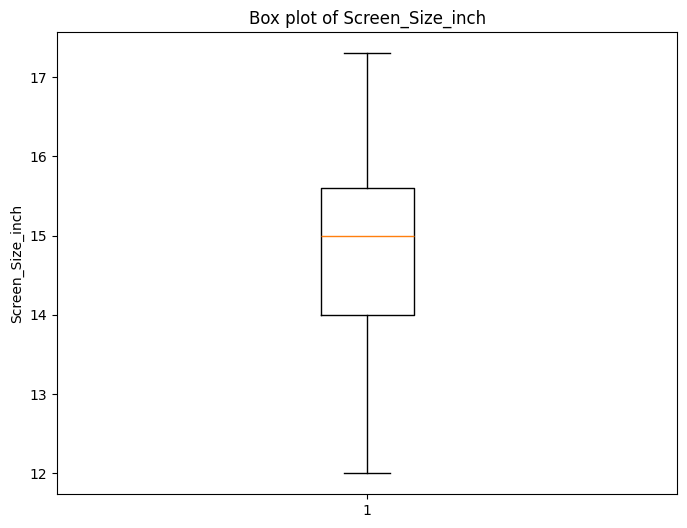

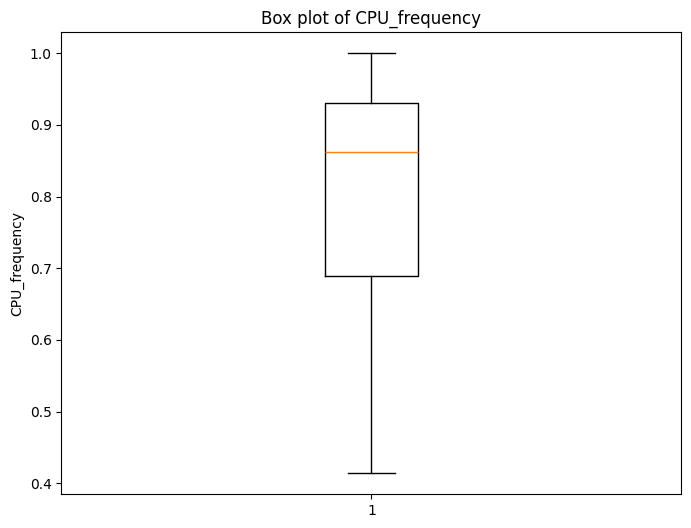

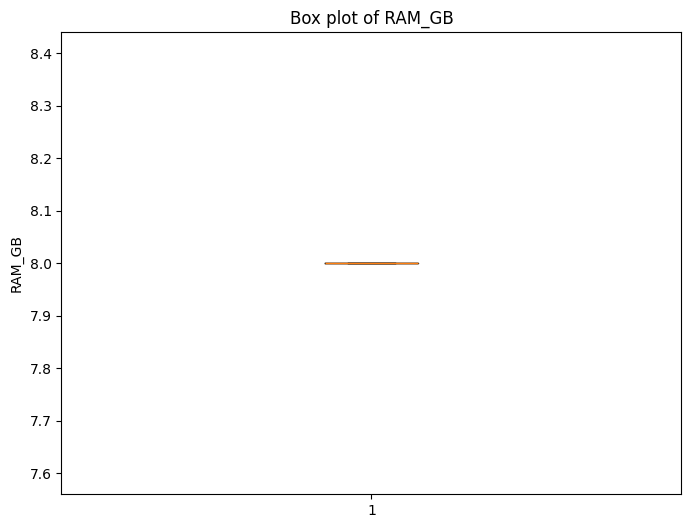

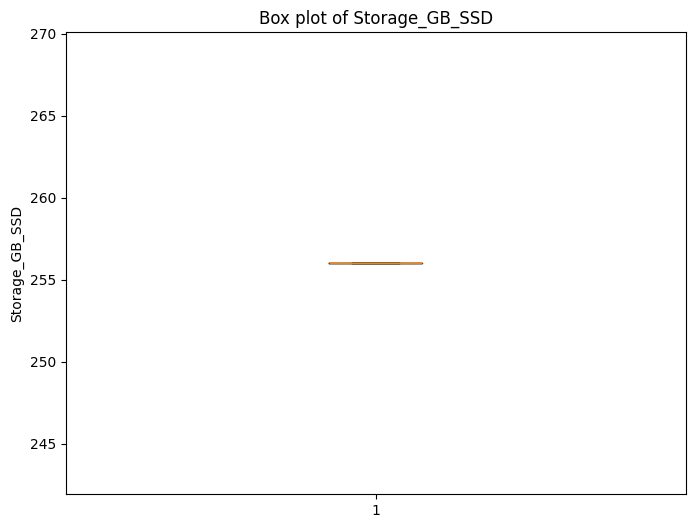

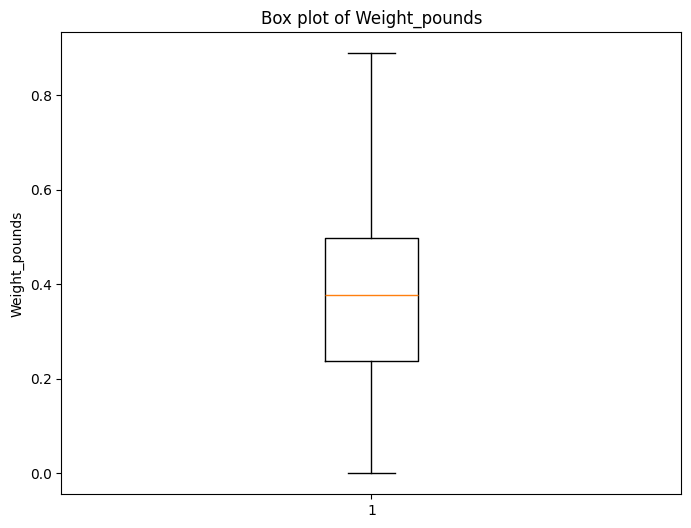

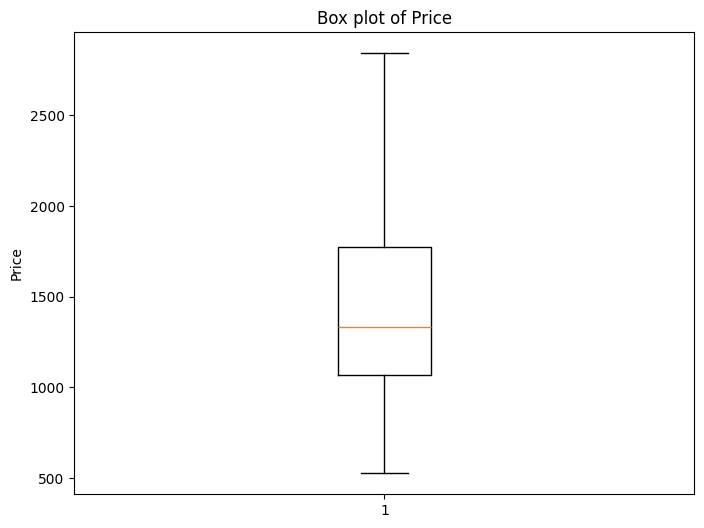

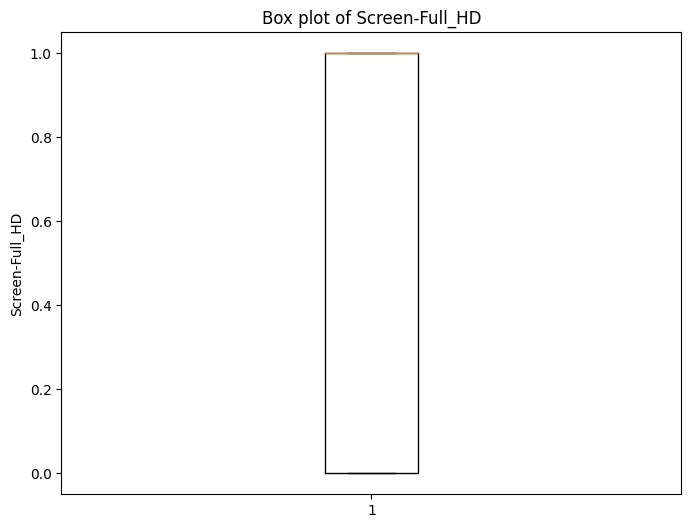

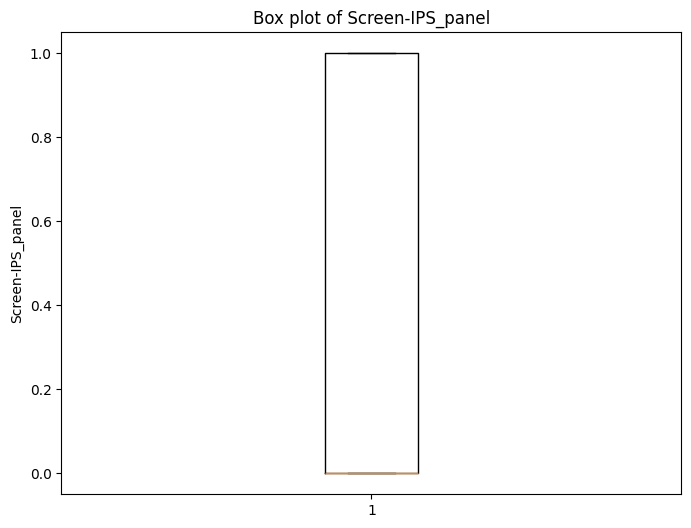

In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

In [58]:
x = df.drop(['Price', 'Price_binned', 'Manufacturer', 'OS'], axis=1)
y = df['Price']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [112]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree = 8)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x, y)
y_pred = pipe.predict(X_test)
r = r2_score(y_test, y_pred)
r

0.9854623575052969

In [113]:
# Calculate R-squared for the training set
y_train_pred = pipe.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate R-squared for the testing set (already calculated as 'r')
r2_test = r

print(f'R-squared on Training Set: {r2_train}')
print(f'R-squared on Testing Set: {r2_test}')

# You can compare these values. If the training R-squared is significantly higher than the testing R-squared, it suggests overfitting.

R-squared on Training Set: 0.990257399455262
R-squared on Testing Set: 0.9854623575052969


In [114]:
print(y_test[0:10])
print("___________")
print(y_pred[0:10])


115    1498.0
15      876.0
212    1188.0
126    1142.0
6      1117.0
170     888.0
9      1068.0
222    1219.0
112     710.0
221    1119.0
Name: Price, dtype: float64
___________
[1440.49998842  895.39221849 1188.00001042 1142.00002972 1116.99997416
  888.00000058 1068.00000824 1218.99999764  643.35361178 1162.4999964 ]


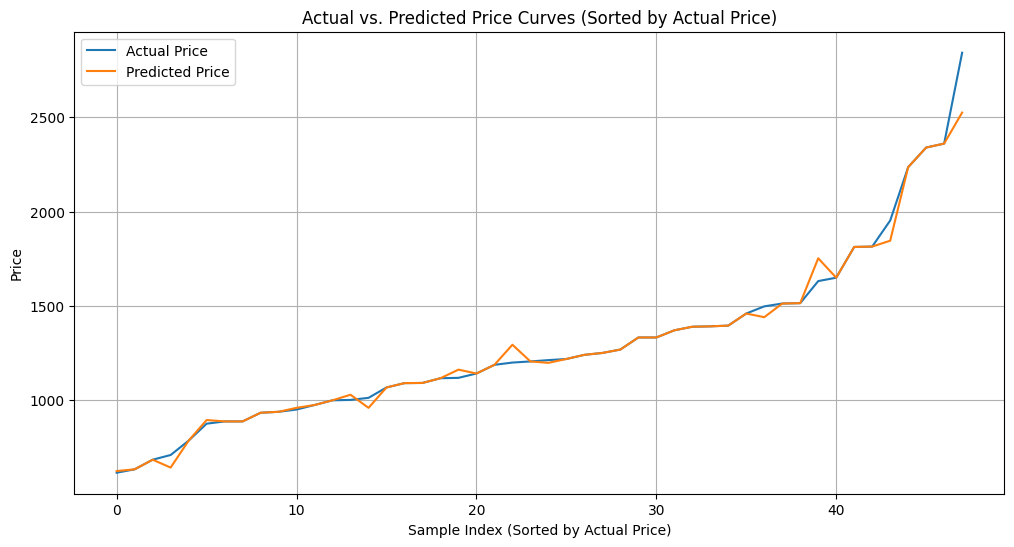

In [105]:
# Sort the test data by actual price for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted.values, label='Actual Price')
plt.plot(y_pred_sorted, label='Predicted Price')
plt.xlabel("Sample Index (Sorted by Actual Price)")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Price Curves (Sorted by Actual Price)")
plt.legend()
plt.grid(True)
plt.show()

In [120]:
# Calculate the mean of the 'Price' column
mean_price = df['Price'].mean()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Price: {mean_price}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print("\nComparison:")
print(f"MAE is approximately {mae / mean_price:.2%} of the mean price.")
print(f"RMSE is approximately {rmse / mean_price:.2%} of the mean price.")

Mean Price: 1446.9600840336134
Mean Absolute Error (MAE): 19.581748791511927
Root Mean Squared Error (RMSE): 55.846283145271215

Comparison:
MAE is approximately 1.35% of the mean price.
RMSE is approximately 3.86% of the mean price.
